# 3.2 Gefangen im Loop

In dieser Übungsaufgabe bewegen wir uns einen kleinen Schritt näher in Richtung der eigenen Programmierung von agentenbasierter Modellierung. Wir "simulieren" sich auf einer Straße fortbewegende Agenten. Wir machen das mit den relativ simplen, nicht immer effizienten und nicht immer eleganten, aber uns aktuell eben zur Verfügung stehenden Mitteln machen. Auch wenn das noch kein richtiges oder sinnvolles ABM ist, lernen wir hier die Grundstruktur eines jeden ABM kennen: Viele viele For-Loops mit denen wir uns u.a. durch die Zeit bewegen, aber auch nacheinander jeden Agenten fassen, auf dessen Eigenschaften zugreifen und den Agenten entsprechend seiner Eigenschaften zum "handeln" bewegen. Wir werden auch eine gaaaaanz einfache "graphische Darstellung" der Simulation programmieren.

Zusätzlich zur generellen Einübung von For-Loops und dem Kennenlernen der ABM-Grundstruktur mit ihren vielen For-Loops, ist diese Übungsaufgabe auch eine Vorbereitung auf das, was im nächsten Kapitel kommt: das [Nagel-Schreckenberg-Modell](https://de.wikipedia.org/wiki/Nagel-Schreckenberg-Modell). Dieses Modell ist in seiner Grundform ein relativ einfaches Modell, um das Phänomen des "Staus aus dem Nichts" zu erklären. Falls du schon jetzt wissen willst, was das ist, schau doch mal in diese Videos rein:

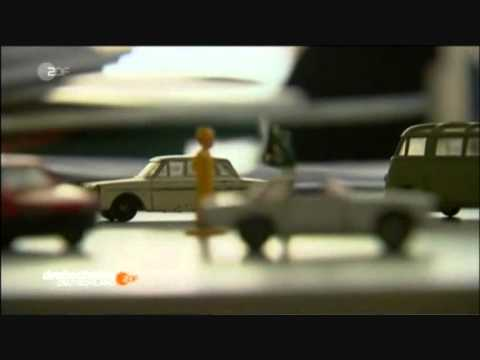

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("V5PAR55bQ30")

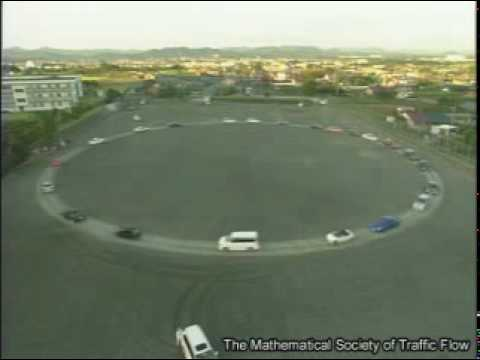

In [2]:
YouTubeVideo("7wm-pZp_mi0")

In dieser Übungsaufgabe werden wir noch nicht die Entstehung von Stau simulieren können, da uns dazu noch ein paar wichtige Werkzeuge fehlen. Z.B. können wir unsere Agenten noch nicht auf ihre Umwelt reagieren lassen. Stattdessen werden unsere Agenten in der nun folgenden Übungsaufgabe einfach ganz stur und komplett reaktionslos ohne auch nur ein kleines bisschen auf ihre Umgebung zu achten geradeaus "fahren".

Wir wollen nun die "Autofahrt" mehrerer Agenten auf einer einspurigen Straße "simulieren". Die Grundidee ist, dass wir eine Population von Agenten haben, deren einzige Eigenschaft deren aktuelle Position auf dieser Straße ist. Diese Position, die man sich vorstellen kann wie eine Koordinate auf einer Achse in einem (eindimensionalen) Koordinatensystem, speichern wir einfach als Zahl. Unsere Population an Agenten besteht somit insgesamt einfach aus Zahlen, da ja jeder Agent einfach nur durch dessen aktueller Position auf der Straße repräsentiert wird. In unserer Simulation lassen wir dann die Agenten "fahren", indem wir deren Position in jedem Zeitschritt verändern. Das ist auch schon alles, was unsere Agenten in dieser Simulation machen können. Graphisch darstellen werden wir das Ganze einfach indem wir die Straße mit den Agenten auf ihrer Position als Zeichenkette (String) darstellen und in die Konsole *printen* werden. Fangen wir an!


### 1.
Wir beginnen damit, ein paar grundlegende Variablen zu definieren, welche wir gleich öfter brauchen oder einfach sehr wichtig sind und somit direkt am Anfang schön sichtbar definiert werden sollten. 
- Erstelle die Variable `STREET_LEN` und weise dieser den Wert `20` zu.Diese Variable dient dazu, die Länge der Straße festzulegen.

- Erstelle zudem die Variable `TICKS` und weise dieser den Wert `10` zu. Diese Variable wird später festlegen, wie viele Zeitschritte wir simulieren möchten.

- Erstelle die Variable `SPEED` und weise dieser den Wert `1` zu. Diese Variable benutzen wir später, um die Geschwindigkeit der Agenten festzulegen.


### 2.
Nun erstellen wir unsere Agenten. Die Agenten verfügen in dieser Simulation ja nur über eine einzige Eigenschaft, nämlich ihre Position auf der Straße, welche wir als Integer (ganze Zahl) repräsentieren. Die Agenten speichern wir alle in einer Liste namens `population`. 
- Erstelle nun die Liste `population`, welche so aussehen soll: `[0, 4, 7]`. 

Wir haben somit drei Agenten, welche sich anfangs auf den Positionen 0, 4 und 7 auf unserer (im Moment noch vorgestellten) Straße befinden. Die Liste `population` ist noch keine direkte Repräsentation der Straße, sondern erstmal nur der Ort, wo wir notieren, auf welcher Position sich unserer Agenten gerade befinden.

### 3.
Als erstes basteln wir uns nun die graphische Darstellung der Straße mit den darauf fahrenden Agenten. Die Frage ist, wie eine solche grafische Darstellung aussehen könnte, denn wir wissen ja noch gar nichts darüber, wie man in Python Grafiken, Diagramme oder Animationen erstellen kann. Das einzige Mittel, mit dem wir aktuell Dinge auf dem Bildschirm darstellen können, ist die Funktion `print()`. Mit dieser können wir einfache Zeichen in der Konsole anzeigen lassen. Damit werden wir nun auch unsere Straße darstellen! 

Jetzt ist noch die Frage, mit welcher Datenstruktur wir die Straße "grafisch" repräsentieren. Dafür benutzen wir zunächst einfach eine Liste, deren Elemente jeweils entweder ein leeres Stück Straße oder ein von einem Auto aktuell besetztes bzw. befahrenes Stück Straße repräsentieren. Einen leeren Straßenabschnitt repräsentieren wir in der Liste mit einem `"_"` und ein befahrenen Straßenabschnitt stellen wir in der Liste mit einem `"#"` dar. Wir brauchen also eine Liste, die so viele Elemente hat, wie die Straße lang ist und an einer Position entweder ein `"_"` oder ein `"#"` aufweist. Wir konstruieren uns diese Liste, indem wir uns eine zunächst leere Liste mit den Symbolen für den leeren Straßenabschnitt befülllen und dann an den entsprechenden Stellen die leeren Straßenabschnitte durch befahrene Straßenabschnitte (also Agenten mit ihren Autos) austauschen.

- Erstelle eine leere Liste und weise diese der Variable `street` zu.
- Nutze nun einen For-Loop und die Listen-Methode `.append()`, um der noch leeren Liste `street` 20 mal ein `"_"` anzuhängen. 

Das `"_"` repräsentiert für uns eine leere Straßenposition. An der Stelle, wo wir dem For-Loop sagen, wie oft er ausgeführt werden soll, bietet es sich an, statt einer ausgeschrieben `20` stellvertretend die Variable `STREET_LEN` einzufügen. In dieser haben wir ja bereits schon die Länge der Straße, nämlich 20, eingespeichert. Dadurch können wir dann später einfacher die Länge der Straße verändern!

- Überprüfe, ob die Liste `street` so aussieht: `["_", "_", "_", "_", "_", "_", "_", "_", "_", "_", "_", "_", "_", "_", "_", "_", "_", "_", "_", "_"]`


### 4.

Die Liste `street` repräsentiert nun eine komplett leere Straße mit der Länge `STREET_LEN`. Nun wollen wir die grafische Darstellung unserer Agenten an den entsprechenden Positionen auf der Straße in die Liste `street` einfügen. Wir müssen also unsere Population von Agenten durchgehen und für jeden Agenten dessen grafische Darstellung in die Liste `street` an der richtigen Position einfügen. Dafür nutzen wir einen For-Loop und Listenindizierung.

- Beginne einen For-Loop über die Liste `population` der Form `for agent_position in population:`.
- Setze für jeden Agenten bzw. für jede `agent_position` ein `"#"` an die entsprechende Position `agent_position` in der Liste `street` ein. Nutze also die Schleifenvariable `agent_position` als Index beim Zugriff auf die Liste `street`. Überschreibe in der Liste `street` das Symbol für einen leeren Straßenabschnitt mit dem Symbol für einen befahrenen Straßenabschnitt jeweils an allen Positionen, wo sich ein Agent befindet.

Die Liste `street` sollte nun so aussehen: `["#", "_", "_", "_", "#", "_", "_", "#", "_", "_", "_", "_", "_", "_", "_", "_", "_", "_", "_", "_"]`


### 5.

Nun haben wir es geschafft, die aktuellen Positionen der 3 Agenten auf einer Straße "grafisch" darzustellen. Wir können unsere grafische Darstellung aber noch etwas optimieren. Dies tun wir, indem wir die Elemente unserer Liste `street` als eine Zeichenkette (also einen String) zusammenfügen. Wir könnten dies natürlich auch wieder in einem tollen For-Loop machen, in welchem wir die Liste `street` durchgehen, die Elemente nacheinander herausholen und nach und nach als einen String zusammensetzen. Wir gehen hier aber eine Abkürzung und nutzen die uns noch unbekannte String-Methode `.join()`. Ich verzichte hier auf genauere Erläuterungen der Methode `.join()`, wenn du mehr über diese Methode wissen willst, schau doch mal [hier](https://www.python-lernen.de/string-methode-join.htm) oder vielleicht sogar [hier](https://realpython.com/python-string-split-concatenate-join/).

- Erstelle eine Variable namens `street_as_string` und weise ihr folgendes zu: `"".join(street)`.

Durch diesen Code haben wir nun alle Elemente der Liste `street` miteinander verbunden. Die Variable `street_as_string` sollte dann so aussehen: `"#___#__#____________"`


- Benutze in deinem Skript nun die Funktion `print()`, um die Variable `street_as_string` in die Konsole zu printen.

Dies ist dann die Stelle im Code, durch die einmal pro Zeitschritt der aktuelle Zustand der Straße dargestellt wird. Aktuell ist das eben noch nur genau ein Zeitschritt, sodass beim gesamten Ausführen des Codes/Skriptes nun genau einmal der aktuelle Zustand der Variable `street_as_string` dargestellt werden sollte.


### 6.

Der bisherige Code stellt genau einen Zeitschritt dar. Wir wollen aber mehrere Zeitschritte simulieren. 

- Schreibe einen For-Loop, der den gesamten bisherigen Code, außer der Definition der Variablen `STREET_LEN`, `TICKS`, `SPEED` und `population`, mehrere male komplett ausführt. Wie oft der Code durch den For-Loop wiederholt wird, soll dabei durch die Variable `TICKS` bestimmt werden.

Wenn nun das gesamte Python-Skript ausgeführt wird, dann sollte 10 mal hintereinander `"#___#__#____________"` in der Konsole erscheinen.


### 7.
Der bisherige Code simuliert zwar 10 Zeitschritte, aber die Agenten machen nichts. Sie stehen einfach auf der Straße rum. Wir wollen sie nun fahren lassen! Das machen wir, indem wir in jeden Zeitschritt die Position der Agenten um den Wert von `SPEED` (also 1) erhöhen.

- Füge einen For-Loop hinzu, welcher in jedem Zeitschritt jeden Agenten in der Liste `population` durchgeht und den jeweiligen Wert des Agenten (die Position auf der Straße) um den Wert von `STREET_LEN` erhöht. Da du den Wert des Agenten in der Liste `population` überschreiben musst, musst du bei diesem For-Loop die Elemente von `population` per Listenindizierung durchgehen. Ganz allgemein mit Platzhaltern für die konkreten Werte formuliert ergibt sich die neue Position eines Agenten so: `Neue_Position = Alte_position + Geschwindigkeit`. Du musst nur die entsprechenden Platzhalter durch die richtigen Variablen und Listenzugriffe im Code ersetzen.

Der Beginn des For-Loops sollte also so aussehen: `for i in range(len(population)):`.

- Führe den gesamten Code aus.

Nun sollten sich die `"#"` auf unserer Straße in jedem Zeitschritt um eine Position nach vorne bewegen.

Wow! Wir haben es geschafft. Wir haben unsere Population von Agenten zum Handeln gebracht. Zugegeben unsere Agenten sind noch etwas blöd, fahren die ganze Zeit nur gerade aus und besonders spannend ist das auch alles nicht. Aber wir wissen nun, wie ungefähr jede Simulation ganz ganz grob aussehen wird, auch wenn wir später unsere Agenten mit anderen Objekt-Typen darstellen werden oder auch etwas anschaulichere grafische Darstellungen verwenden werden.

Wenn du hier angekommen bist, dann kannst dir auf die Schulter klopfen und stolz sein!


### 8.

Wir haben am Anfang die Variablen `STREET_LEN`, `TICKS` und `SPEED` definiert. Diese können wir als "Parameter" unserer Simulation verstehen. Verändern wir diese, verändern wir den Output unserer Simulation.

- Experimentiere etwas mit den Variablen `STREET_LEN`, `TICKS` und `SPEED` und weise diesen beliebige andere Werte zu.

Es kann sehr gut sein, dass Python bei bestimmten Werten für diese Variablen einen **Fehler** anzeigt.


### 9.

Wenn du nun etwas mit den "Parametern" unserer Simulation herumgespielt hast, dann ist sehr wahrscheinlich nach einiger Zeit dieser Fehler aufgetreten:

`IndexError: list assignment index out of range`

Wenn es dir dieser Fehler aufgetreten ist: sehr gut! Wenn dir kein Fehler aufgetreten ist: auch sehr gut! Wenn dir irgendein anderer Fehler aufgetreten ist: ich habe keine Ahnung was du getan hast!

Der obige Fehler sollte auftreten, wenn einer der Agenten am Ende der Straße angekommen ist und nun versucht weiter zu fahren. Der Positionsindex des Agenten wird dabei zu weit erhöht und geht über die in der Liste `street` überhaupt vorhandenen Positionen hinaus. Das ist schlecht!

Wie lösen wir das Problem? Wir setzen einfach alle Agenten, die ganz rechts angekommen sind, wieder nach links auf die Straße! Und wie machen wir das? Mit dem **Modulo**! Der Modulo kann genutzt werden, um die Position der Agenten, sobald sie einen Grenzwert überschreitet, wieder auf 0 zu setzen. Dadurch wird der Agent wieder an den linken Rand gesetzt, wenn er rechts "rausfahren" sollte. Verwende den Modulo bei der Berechnung der neuen Position des Agenten, um eine zu hohe Position zu verhindern und praktisch das rechte Ende der Straße mit dem linken Ende der Straße zu verbinden. Die neue Position wird mithilfe des Modulo ganz allgemein so berechnet: 

`Neue_Position = (Alte_position + Geschwindigkeit) % Straßenlänge`

- Erweitere die aktuelle Berechnung der neuen Position mit dem Modulo, sodass die neue Position auf 0 gesetzt wird, sobald diese zu hoch wird.

- Teste dein Programm.


### 10. 

- Schaffst du es, die Fahrtrichtung der Agenten zu ändern?

## Hilfestellung

Es ist manchmal etwas schwer aus sprachlichen Beschreibungen darüber, was das Programm machen soll, wirklich zu verstehen, wie der Code aussehen soll. Prinzipiell gibt es auch viele mögliche Wege, das zu coden, was ich oben beschreibe. Als kleine Hilfestellung zeige ich dir unten Ausschnitte aus meiner Lösung der Aufgaben. Alle `...` müssen durch den richtigen Code ersetzt werden. Vielleicht hilft das ja. Beachte, dass der For-Loop `for tick in TICKS:` erst in Aufgabe 6 nachträglich eingebaut wird und somit auch erst dann der Code, der nach der Zeile `for tick in TICKS:` kommt, entsprechend eingerückt wird.


```python

# Parameter der Simulation definieren (Aufgabe 1)
STREET_LEN = ...
TICKS = ...
SPEED = ...

# Agenten-Population erstellen (Aufgabe 2)
... = ...

# für jeden Zeitschritt (Aufgabe 6)
for tick in range(TICKS):
    
    # Straße als Liste darstellen (Aufgabe 3)
    street = ...
    for ... in range(STREET_LEN):
        ...
    
    # Agenten auf Straße setzen (Aufgabe 4)
    for ... in population:
        street[agent_position] = ...
    
    # Straße als String darstellen und in Konsole printen (Aufgabe 5)
    street_as_string = ...
    ...(street_as_string)
    
    # Position der Agenten verändern (Aufgabe 7 & 9)
    for i in range(len(population)):
        population[i] = ...
        
```